# Top 1000 Twitch Streamers Exploratory Analysis
The goal of this project is to provide a usable, cleaned format of a dataset containing information on the top 1000 Twitch streamers as of May 23, 2024, as well as explore potentially revealing trends. Streamers in this dataset are given an overall rank based on a cummulative score of average concurrent viewers, followers, views, and stream time.

#### Import necessary libraries and read dataset as pandas dataframe:

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

twitch_df = pd.read_csv('dataset.csv')

#### Initial Dataset Observations:

In [136]:
twitch_df.head()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday


Note: '.' character is used in place of a comma to separate values greater than 999 for columns: 'FOLLOWERS_GAINED_PER_STREAM', 'AVG_VIEWERS_PER_STREAM', 'TOTAL_TIME_STREAMED'.

In [137]:
twitch_df.dtypes

RANK                                int64
NAME                               object
LANGUAGE                           object
TYPE                               object
MOST_STREAMED_GAME                 object
2ND_MOST_STREAMED_GAME             object
AVERAGE_STREAM_DURATION           float64
FOLLOWERS_GAINED_PER_STREAM       float64
AVG_VIEWERS_PER_STREAM            float64
AVG_GAMES_PER_STREAM              float64
TOTAL_TIME_STREAMED               float64
TOTAL_FOLLOWERS                     int64
TOTAL_VIEWS                         int64
TOTAL_GAMES_STREAMED                int64
ACTIVE_DAYS_PER_WEEK              float64
MOST_ACTIVE_DAY                    object
DAY_WITH_MOST_FOLLOWERS_GAINED     object
dtype: object

All values appear to be of the correct type with the exception of values greater than 999 being separated by a '.' character in columns noted previously, causing those values to be flagged as float64 as opposed to int.

In [138]:
twitch_df.describe()

,RANK,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02,999.000000,999.000000
mean,500.972973,5.996697,266.788599,70.257758,1.477878,56.961769,9.194033e+05,3.001478e+07,141.707708,3.591391
std,288.576373,3.241013,274.912323,163.873300,0.575189,322.866528,1.725451e+06,6.280328e+07,245.930466,1.797796
min,1.000000,1.200000,-424.000000,0.000000,1.000000,1.004000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,251.500000,4.200000,5.546500,3.381000,1.100000,3.702000,1.875000e+05,6.455000e+05,16.000000,2.200000
50%,501.000000,5.400000,185.000000,12.454000,1.300000,7.140000,4.370000e+05,6.950000e+06,55.000000,3.800000
75%,750.500000,6.900000,444.000000,37.596000,1.700000,13.588500,8.895000e+05,3.015000e+07,168.000000,5.100000
max,1000.000000,23.900000,991.000000,991.000000,9.300000,9092.000000,1.900000e+07,5.720000e+08,2980.000000,7.000000


In [139]:
twitch_df.shape

(999, 17)

#### Data Tidying:

In [140]:
#replace '.' with empty string in appropriate columns
twitch_df['FOLLOWERS_GAINED_PER_STREAM'] = twitch_df['FOLLOWERS_GAINED_PER_STREAM'].astype(str) 
twitch_df['FOLLOWERS_GAINED_PER_STREAM'] = twitch_df['FOLLOWERS_GAINED_PER_STREAM'].str.replace('.', '')
twitch_df['AVG_VIEWERS_PER_STREAM'] = twitch_df['AVG_VIEWERS_PER_STREAM'].astype(str) 
twitch_df['AVG_VIEWERS_PER_STREAM'] = twitch_df['AVG_VIEWERS_PER_STREAM'].str.replace('.', '')
twitch_df['TOTAL_TIME_STREAMED'] = twitch_df['TOTAL_TIME_STREAMED'].astype(str) 
twitch_df['TOTAL_TIME_STREAMED'] = twitch_df['TOTAL_TIME_STREAMED'].str.replace('.', '')
twitch_df.head()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18405,15852,2.3,4698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3386,1145,1.2,8407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,6890,12331,1.3,6728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7185,00,3.6,2554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8289,190714,1.5,6865,15600000,359000000,149,4.3,Wednesday,Saturday


In [141]:
#convert to int
twitch_df['FOLLOWERS_GAINED_PER_STREAM'] = pd.to_numeric(twitch_df['FOLLOWERS_GAINED_PER_STREAM'])
twitch_df['AVG_VIEWERS_PER_STREAM'] = pd.to_numeric(twitch_df['AVG_VIEWERS_PER_STREAM'])
twitch_df['TOTAL_TIME_STREAMED'] = pd.to_numeric(twitch_df['TOTAL_TIME_STREAMED'])
twitch_df.dtypes

RANK                                int64
NAME                               object
LANGUAGE                           object
TYPE                               object
MOST_STREAMED_GAME                 object
2ND_MOST_STREAMED_GAME             object
AVERAGE_STREAM_DURATION           float64
FOLLOWERS_GAINED_PER_STREAM         int64
AVG_VIEWERS_PER_STREAM              int64
AVG_GAMES_PER_STREAM              float64
TOTAL_TIME_STREAMED                 int64
TOTAL_FOLLOWERS                     int64
TOTAL_VIEWS                         int64
TOTAL_GAMES_STREAMED                int64
ACTIVE_DAYS_PER_WEEK              float64
MOST_ACTIVE_DAY                    object
DAY_WITH_MOST_FOLLOWERS_GAINED     object
dtype: object

#### EDA:
Considering that the dataset provides many features of the most recognized Twitch streamers, it may be worthwhile to explore what tendencies correlate with being a more successfful streamer on the platform.


#### Hours Streamed and Popularity Rank:

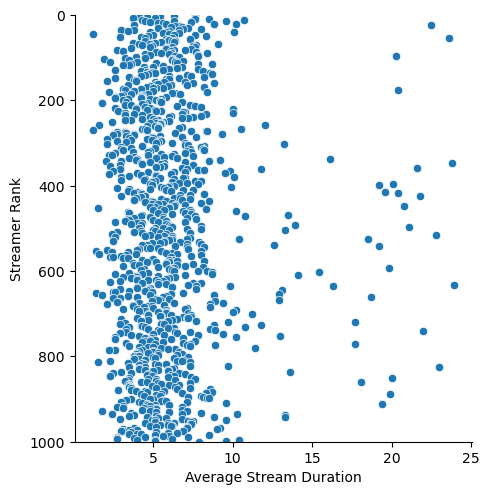

In [142]:
avg_hours_to_rank = sns.relplot(data=twitch_df, x='AVERAGE_STREAM_DURATION', y='RANK')
avg_hours_to_rank.set(ylim=(1000,0), xlabel='Average Stream Duration', ylabel='Streamer Rank')

Stream length does not appear to strongly correlate to higher rank among the top streamers.

#### Most Popular Category:

Text(0, 0.5, '# Of Streamers')

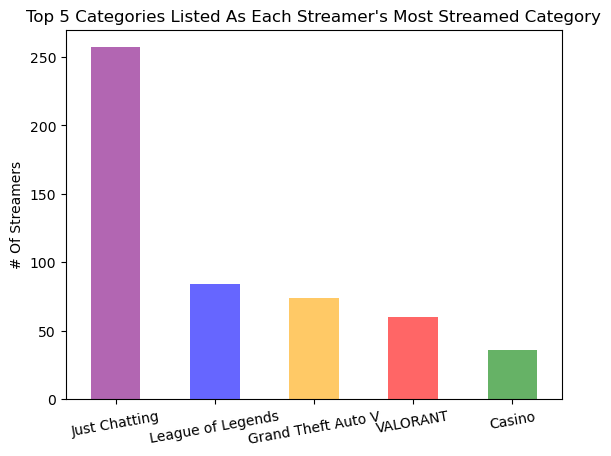

In [143]:
top_5_cat = twitch_df['MOST_STREAMED_GAME'].value_counts()[:5].plot(kind="bar", rot=10, color=['purple', 'blue', 'orange', 'red', 'green'], alpha=0.6)
top_5_cat.set_title('Top 5 Categories Listed As Each Streamer\'s Most Streamed Category')
top_5_cat.set_xlabel('')
top_5_cat.set_ylabel('# Of Streamers')             

Despite previously banning users for not streaming video games, the most popular category among top streamers is now content that does not include gaming. Additionally, gambling content continues to be in the top 5 for the most category among top streamers despite Twitch's terms of service changes that attempted to stifle gambling streams. Popular esports titles continue to remain a staple yet still are considerably less common than the Just Chatting category.

#### Is variety preferred over streaming in fewer categories?

TOTAL_GAMES_STREAMED
1      77
2      36
3      23
15     14
14     12
       ..
64      1
268     1
355     1
410     1
782     1
Name: count, Length: 335, dtype: int64

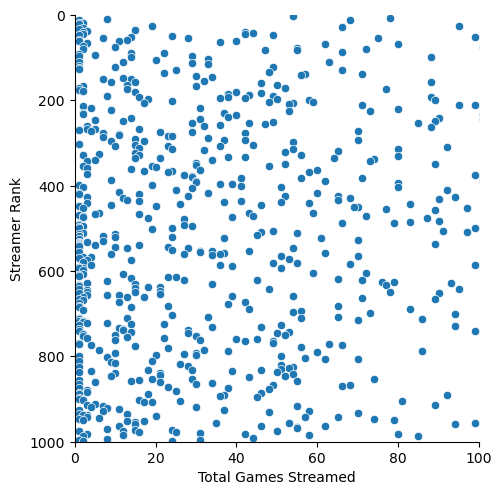

In [144]:
number_of_cat_to_rank = sns.relplot(data=twitch_df, x='TOTAL_GAMES_STREAMED', y='RANK')
number_of_cat_to_rank.set(xlim=(0,100), ylim=(1000,0), xlabel='Total Games Streamed', ylabel='Streamer Rank')
twitch_df['TOTAL_GAMES_STREAMED'].value_counts(sort=True)

Variety seems to be common among the top 1000 streamers, although 13.6% of them stuck to 3 or less categories.

#### Best Day To Stream Based On Follower Increase:

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Wednesday')])

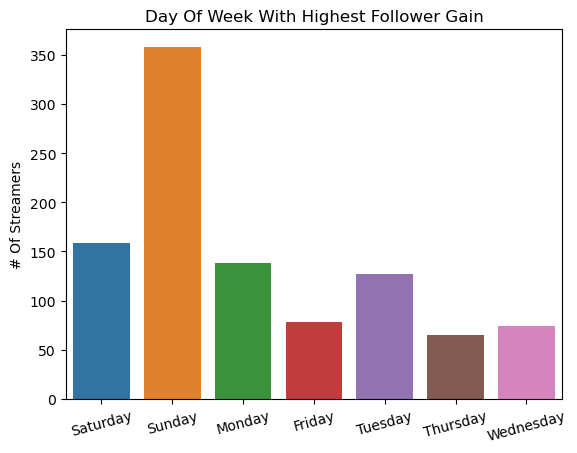

In [145]:
top_performing_day = sns.countplot(data=twitch_df, x='DAY_WITH_MOST_FOLLOWERS_GAINED')
top_performing_day.set(title='Day Of Week With Highest Follower Gain', xlabel='', ylabel='# Of Streamers')
plt.xticks(rotation=15)

Weekend growth does not seem to be relevant, though Sunday has expceptionally high follower gain overall.

### Initial Takeaway:

It may be worth exploring how consistency and various methods of entertaining compares to searching for ideal timing and category choice when considering Twitch success. Early observations seem to suggest that sheer hours streamed does not equate to popularity rank as there does not seem to be a strong correlation between more hours per stream and higher rank. Additionally, daily growth is mostly affected only on Sunday. The most clear shift based on this data is that top streamers strongly favor non-gaming content, with the Just Chatting category being the most popular to stream under by more than double of the next most streamed gaming counterpart.